# Project Proposal: Advanced NLP-based Job Recommendation System for BrighterMonday

###### CAPSTONE PROJECT
***PHASE 5:GROUP 2 MEMBERS:***
1.   Isaac Munyaka.
2.   Phemina Wambui.
3.   Otiende Ogada.
4.   Caroline Gesaka.
5.   Ann Njoroge.
6.   Joan Maina.

## Background Story

BrighterMonday is a prominent job portal in Kenya, renowned for bridging the gap between job seekers and employers. Despite its success in providing job listings and basic job matching functionalities, there is an increasing demand for more sophisticated and tailored job recommendation systems. These advanced systems aim to enhance the job search experience by offering personalized recommendations that align more closely with individual skills, preferences, and career goals. This evolution is crucial for improving the efficiency and effectiveness of job matching, ultimately benefiting both job seekers and employers by making the process more targeted and relevant (BrighterMonday, 2024).

## Introduction
To elevate BrighterMonday’s job matching capabilities and enhance user experience, this project proposes the development of an advanced job recommendation system powered by Natural Language Processing (NLP). By leveraging state-of-the-art NLP technologies, the proposed system aims to deliver highly accurate job recommendations tailored to individual job seekers' skills, preferences, and career aspirations. Additionally, the system will provide comprehensive job insights and actionable feedback, further supporting job seekers in their search and application processes. This advancement will not only improve the relevance of job matches but also empower users with valuable information and guidance, ultimately enhancing their overall experience on the platform.

## Business Understanding
The goal of this project is to significantly enhance the accuracy and relevance of job matching on BrighterMonday, ultimately improving the job search experience for seekers and streamlining the recruitment process for employers. By implementing an advanced NLP-based recommendation system, the project aims to provide job seekers with tailored job opportunities that align closely with their skills, preferences, and career goals. For employers, the system will facilitate the identification of qualified candidates by matching job postings with the most suitable applicants. This dual focus will not only help job seekers find better employment opportunities but also assist employers in efficiently sourcing candidates who meet their specific requirements.

## Problem Statement
Job seekers on BrighterMonday frequently encounter difficulties in finding job opportunities that closely align with their skills and experience. The existing job matching system relies predominantly on keyword-based searches, which can result in inaccurate job matches and overlooked opportunities. This approach often fails to capture the nuanced qualifications and preferences of job seekers, leading to suboptimal job recommendations and a less efficient job search process. Consequently, there is a need for a more advanced and precise recommendation system that better understands and matches the diverse qualifications and aspirations of job seekers.

## Objectives
***1.Develop an Advanced NLP-Based Job Recommendation System***:
Implement cutting-edge Natural Language Processing (NLP) models to enhance the accuracy and relevance of job matching, ensuring that job seekers receive recommendations that are closely aligned with their skills, experience, and career goals.

***2.Provide Detailed Job Information***:
Deliver comprehensive insights into job opportunities, including key details such as compensation, location, work type, and experience level, to help job seekers make informed decisions.

***3.Implement Skills Gap Analysis***: 
 Develop a mechanism to identify gaps between job seekers' current skills and those required for desired positions, and offer recommendations for skill development to enhance their qualifications and employability.
 
***4.Integrate a User Feedback System***:
Establish a system for collecting and analyzing user feedback on job recommendations, enabling continuous refinement and improvement of the recommendation engine based on real user experiences and preferences.

***5.Offer Job Market Trends and Insights***: 
Provide data-driven insights into current job market trends and in-demand skills, helping job seekers and employers stay informed about evolving industry requirements and opportunities.

## Target Audience
***Job Seekers***: Individuals seeking suitable job opportunities and career growth.

***Employers***: Companies looking to recruit qualified candidates for job openings.

***Recruitment Agencies***: Agencies that assist job seekers and employers in the recruitment process.

## SUCCESS METRICS

Common Target Variables in Job-related Data:
Filled Status: Indicates whether the job position was filled.
Hire Status: Indicates whether a candidate was hired.
Salary Range Classification: Could classify jobs into different salary ranges (low, medium, high).
Application Status: Indicates whether an application was submitted, reviewed, accepted, etc.

## 1.Data Understanding

***Dataset***: LinkedIn Job Postings

***Source***: LinkedIn Job Postings (2023 - 2024) (kaggle.com)

***Columns***:

job_id: Unique identifier for each job posting, essential for tracking and referencing individual jobs.

company_name: Provides the name of the company offering the job, which helps in understanding the job context and employer branding.

title: The job title is critical for identifying the nature of the job and matching it with user preferences.

description: Contains detailed information about job responsibilities and requirements, which is crucial for matching the job with user skills and interests.

max_salary: Indicates the highest salary offered for the job, helping to match job seekers' salary expectations.

min_salary: Shows the lowest salary offered, providing a range for matching job seekers' financial requirements.

location: Geographic location of the job, which is important for matching based on job seekers' preferred or available locations.

views: Number of views the job posting has received, which can indicate the popularity or competitiveness of the job.

med_salary: Median salary for the job, providing a central measure of compensation, useful for understanding typical earnings.

applies: Number of applications received, which can reflect job demand and help gauge the job's attractiveness.

remote_allowed: Indicates if remote work is an option, which is increasingly relevant for job seekers preferring or needing remote work arrangements.

formatted_experience_level: Specifies the required experience level (e.g., entry-level, senior), aiding in matching jobs with job seekers' experience.

skills_desc: Describes the skills required for the job, crucial for aligning job seekers' skills with job requirements.

listed_time: Timestamp of when the job was posted, helping to understand the job’s recency and relevance.

posting_domain: Indicates the industry or sector of the job, useful for matching jobs with job seekers’ industry interests.

currency: Specifies the currency in which the salary is offered, important for job seekers in different regions or countries.

compensation_type: Details the type of compensation (e.g., base salary, bonuses), helping job seekers understand the total compensation package.


### Load the DataSet

In [1]:
import pandas as pd

file_path = r'C:\Users\Caro\Downloads\postings.csv'

try:
    data = pd.read_csv(file_path, encoding='utf-8', on_bad_lines='warn')
except UnicodeDecodeError:
    data = pd.read_csv(file_path, encoding='latin1', on_bad_lines='warn')

data.head()


,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,1.715990e+12,NaN,NaN,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,1.715450e+12,NaN,NaN,NaN,1.712858e+12,NaN,0,FULL_TIME,USD,BASE_SALARY
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,1.715870e+12,NaN,NaN,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,1.715488e+12,NaN,NaN,This position requires a baseline understandin...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,...,1.716044e+12,NaN,NaN,NaN,1.713452e+12,NaN,0,FULL_TIME,USD,BASE_SALARY


In [2]:
data.tail()

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type
123844,3906267117,Lozano Smith,Title IX/Investigations Attorney,Our Walnut Creek office is currently seeking a...,195000.0,YEARLY,"Walnut Creek, CA",56120.0,1.0,NaN,...,1.716163e+12,NaN,Mid-Senior level,NaN,1.713571e+12,NaN,0,FULL_TIME,USD,BASE_SALARY
123845,3906267126,Pinterest,"Staff Software Engineer, ML Serving Platform",About Pinterest:\n\nMillions of people across ...,NaN,NaN,United States,1124131.0,3.0,NaN,...,1.716164e+12,NaN,Mid-Senior level,NaN,1.713572e+12,www.pinterestcareers.com,0,FULL_TIME,NaN,NaN
123846,3906267131,EPS Learning,"Account Executive, Oregon/Washington",Company Overview\n\nEPS Learning is a leading ...,NaN,NaN,"Spokane, WA",90552133.0,3.0,NaN,...,1.716164e+12,NaN,Mid-Senior level,NaN,1.713572e+12,epsoperations.bamboohr.com,0,FULL_TIME,NaN,NaN
123847,3906267195,Trelleborg Applied Technologies,Business Development Manager,The Business Development Manager is a 'hunter'...,NaN,NaN,"Texas, United States",2793699.0,4.0,NaN,...,1.716165e+12,NaN,NaN,NaN,1.713573e+12,NaN,0,FULL_TIME,NaN,NaN
123848,3906267224,Solugenix,Marketing Social Media Specialist,Marketing Social Media Specialist - $70k – $75...,75000.0,YEARLY,"San Juan Capistrano, CA",43325.0,2.0,NaN,...,1.716165e+12,NaN,Mid-Senior level,NaN,1.713573e+12,NaN,0,FULL_TIME,USD,BASE_SALARY


In [3]:
data.description

0         Job descriptionA leading real estate firm in N...
1         At Aspen Therapy and Wellness , we are committ...
2         The National Exemplar is accepting application...
3         Senior Associate Attorney - Elder Law / Trusts...
4         Looking for HVAC service tech with experience ...
                                ...                        
123844    Our Walnut Creek office is currently seeking a...
123845    About Pinterest:\n\nMillions of people across ...
123846    Company Overview\n\nEPS Learning is a leading ...
123847    The Business Development Manager is a 'hunter'...
123848    Marketing Social Media Specialist - $70k – $75...
Name: description, Length: 123849, dtype: object

In [4]:
data.shape

(123849, 28)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123849 entries, 0 to 123848
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   job_id                      123849 non-null  int64  
 1   company_name                122130 non-null  object 
 2   title                       123849 non-null  object 
 3   description                 123842 non-null  object 
 4   max_salary                  29793 non-null   float64
 5   pay_period                  36073 non-null   object 
 6   location                    123849 non-null  object 
 7   company_id                  122132 non-null  float64
 8   views                       122160 non-null  float64
 9   med_salary                  6280 non-null    float64
 10  min_salary                  29793 non-null   float64
 11  formatted_work_type         123849 non-null  object 
 12  applies                     23320 non-null   float64
 13  original_liste

### Unique Values

In [6]:
# For loop to generate and print unique values for each column
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("\n")  # Add a newline for better readability between columns

Unique values in column 'job_id':
[    921716    1829192   10998357 ... 3906267131 3906267195 3906267224]


Unique values in column 'company_name':
['Corcoran Sawyer Smith' nan 'The National Exemplar ' ... 'The Dyrt'
 'EPS Learning' 'Trelleborg Applied Technologies']


Unique values in column 'title':
['Marketing Coordinator' 'Mental Health Therapist/Counselor'
 'Assitant Restaurant Manager' ...
 'Staff Software Engineer, ML Serving Platform'
 'Account Executive, Oregon/Washington'
 'Marketing Social Media Specialist']


Unique values in column 'description':
['Job descriptionA leading real estate firm in New Jersey is seeking an administrative Marketing Coordinator with some experience in graphic design. You will be working closely with our fun, kind, ambitious members of the sales team and our dynamic executive team on a daily basis. This is an opportunity to be part of a fast-growing, highly respected real estate brokerage with a reputation for exceptional marketing and extraordinar

### Duplicates

In [7]:
# Check for duplicates based on all columns
duplicate_rows = data[data.duplicated()]

# Display the duplicate rows, if any
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")


No duplicate rows found.


### PlaceHolders

In [8]:
#Define a comprehensive list of potential placeholder values
common_placeholders = ["", "na", "n/a", "NaN", "none", "null", "-", "--", "?", "??", "unknown", "missing", "void"]
# Loop through each column and check for potential placeholders
found_placeholder = False
for column in data.columns:
    unique_values = data[column].unique()
    for value in unique_values:
        if pd.isna(value) or (isinstance(value, str) and value.strip().lower() in common_placeholders):
            count = (data[column] == value).sum()
            print(f"Column '{column}': Found {count} occurrences of potential placeholder '{value}'")
            found_placeholder = True
if not found_placeholder:
    print("No potential placeholders found in the DataFrame.")

Column 'company_name': Found 0 occurrences of potential placeholder 'nan'
Column 'description': Found 0 occurrences of potential placeholder 'nan'
Column 'max_salary': Found 0 occurrences of potential placeholder 'nan'
Column 'pay_period': Found 0 occurrences of potential placeholder 'nan'
Column 'company_id': Found 0 occurrences of potential placeholder 'nan'
Column 'views': Found 0 occurrences of potential placeholder 'nan'
Column 'med_salary': Found 0 occurrences of potential placeholder 'nan'
Column 'min_salary': Found 0 occurrences of potential placeholder 'nan'
Column 'applies': Found 0 occurrences of potential placeholder 'nan'
Column 'remote_allowed': Found 0 occurrences of potential placeholder 'nan'
Column 'application_url': Found 0 occurrences of potential placeholder 'nan'
Column 'closed_time': Found 0 occurrences of potential placeholder 'nan'
Column 'formatted_experience_level': Found 0 occurrences of potential placeholder 'nan'
Column 'skills_desc': Found 0 occurrences o

### Missing Values

In [9]:
#check missing values
data.isnull().sum()

job_id                             0
company_name                    1719
title                              0
description                        7
max_salary                     94056
pay_period                     87776
location                           0
company_id                      1717
views                           1689
med_salary                    117569
min_salary                     94056
formatted_work_type                0
applies                       100529
original_listed_time               0
remote_allowed                108603
job_posting_url                    0
application_url                36665
application_type                   0
expiry                             0
closed_time                   122776
formatted_experience_level     29409
skills_desc                   121410
listed_time                        0
posting_domain                 39968
sponsored                          0
work_type                          0
currency                       87776
c

In [10]:
#calcute the  percentage of missing values
missing_percentage= data.isnull().sum()*100 /len(data)

# Arrange the columns in descending order based on the percentage of missing values
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)

print(missing_percentage_sorted)


closed_time                   99.133622
skills_desc                   98.030666
med_salary                    94.929309
remote_allowed                87.689848
applies                       81.170619
max_salary                    75.944093
min_salary                    75.944093
currency                      70.873402
compensation_type             70.873402
pay_period                    70.873402
posting_domain                32.271556
application_url               29.604599
formatted_experience_level    23.745852
company_name                   1.387981
company_id                     1.386366
views                          1.363757
description                    0.005652
title                          0.000000
work_type                      0.000000
sponsored                      0.000000
listed_time                    0.000000
expiry                         0.000000
application_type               0.000000
job_posting_url                0.000000
original_listed_time           0.000000


### Column Types

In [11]:
# column names
data.columns


Index(['job_id', 'company_name', 'title', 'description', 'max_salary',
       'pay_period', 'location', 'company_id', 'views', 'med_salary',
       'min_salary', 'formatted_work_type', 'applies', 'original_listed_time',
       'remote_allowed', 'job_posting_url', 'application_url',
       'application_type', 'expiry', 'closed_time',
       'formatted_experience_level', 'skills_desc', 'listed_time',
       'posting_domain', 'sponsored', 'work_type', 'currency',
       'compensation_type'],
      dtype='object')

In [12]:
# Identify numerical columns (int, float, datetime types)
numerical_columns = data.select_dtypes(include=['number', 'datetime']).columns.tolist()

print("Numerical Columns:", numerical_columns)


Numerical Columns: ['job_id', 'max_salary', 'company_id', 'views', 'med_salary', 'min_salary', 'applies', 'original_listed_time', 'remote_allowed', 'expiry', 'closed_time', 'listed_time', 'sponsored']


In [13]:
# Identify categorical columns
categorical_columns = [col for col in data.select_dtypes(include=['object']).columns if col in [
    'pay_period', 'formatted_work_type', 'application_type', 'formatted_experience_level', 
    'work_type', 'currency', 'compensation_type']]

print("Categorical Columns:", categorical_columns)

Categorical Columns: ['pay_period', 'formatted_work_type', 'application_type', 'formatted_experience_level', 'work_type', 'currency', 'compensation_type']


In [14]:
# Identify string columns
string_columns = [col for col in data.select_dtypes(include=['object']).columns if col not in categorical_columns]

print("String Columns:", string_columns)

String Columns: ['company_name', 'title', 'description', 'location', 'job_posting_url', 'application_url', 'skills_desc', 'posting_domain']


## 2.Data Cleaning

### Handling Missing Values

#### Columns to Drop

In [15]:
# Drop the specified columns with reasons
columns_to_drop = [
    'med_salary',      # 94.93% missing; does not provide additional insights from max/min salary
    'company_id',      # Redundant if company_name is sufficient
    'closed_time',      # 99.13% missing; not critical to the core objectives
    'application_url',    # Not integrating a direct application feature 
    'job_posting_url',    # Not integrating a direct application feature
    'posting_domain',     #not essential for our recommender logic
    'original_listed_time',# since we have listed time ,its redundant
    'expiry',       #not essential for our recommender logic
    'sponsored', #not essential for our recommender logic
    'formatted_work_type', #reduntant since we have formatted work type
    'compensation_type'#reduntant since we have pay period column,pay period column provides more sufficient info than this

]


data =data.drop(columns=columns_to_drop)

#### 1.Numerical columns

In [16]:
# Filled with mean values to maintain the average trends
# Impute numerical columns with median to maintain the skewed distributions
numerical_columns = ['job_id','views', 'applies','remote_allowed']
for col in numerical_columns:
    data[col].fillna(data[col].median(), inplace=True)


##### 1.1.Numerical Timeseries  columns

In [17]:
# Handle missing salary information
data['max_salary'].fillna(data['max_salary'].median(), inplace=True)
data['min_salary'].fillna(data['min_salary'].median(), inplace=True)


#### 2.Categorical columns

In [18]:
#Filled with the mode to maintain the most common category
categorical_columns = ['company_name','formatted_experience_level', 'currency']
for col in categorical_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

#### 3.Text columns

In [19]:
#Filled with placeholders to avoid null values.
# Fill text columns with placeholders
data['description'].fillna('No description provided', inplace=True)
data['skills_desc'].fillna('No skills provided', inplace=True)

# Fill missing values with a placeholder
data['company_name'].fillna('Unknown Company', inplace=True)

# Fill missing values with a placeholder
data['pay_period'].fillna('Not Provided', inplace=True)



#### 3.Boolen columns

In [20]:
# Missing values are treated as False.
# convert to Binary
data['remote_allowed'] = data['remote_allowed'].fillna(False).astype(bool)


In [21]:
#check missing values after cleaning
data.isnull().sum()

job_id                        0
company_name                  0
title                         0
description                   0
max_salary                    0
pay_period                    0
location                      0
views                         0
min_salary                    0
applies                       0
remote_allowed                0
application_type              0
formatted_experience_level    0
skills_desc                   0
listed_time                   0
work_type                     0
currency                      0
dtype: int64

In [22]:
#check original dataframe columns
data.columns

#Assingn cleaned dataframe 
df = data

#copy original dataframe original DataFrame
df = df_copy = df.copy()

# Save the copied DataFrame to a CSV file
df_copy.to_csv('copied_postings.csv', index=False)

In [23]:
df.columns

Index(['job_id', 'company_name', 'title', 'description', 'max_salary',
       'pay_period', 'location', 'views', 'min_salary', 'applies',
       'remote_allowed', 'application_type', 'formatted_experience_level',
       'skills_desc', 'listed_time', 'work_type', 'currency'],
      dtype='object')

In [24]:
df.shape

(123849, 17)

## Statistical Analysis

### 1.Descriptive Analysis

In [25]:
# Set the display option to show floats as integers
pd.options.display.float_format = '{:,.0f}'.format

# Summary Statistics for Numeric Columns
summary_stats = df.describe()
summary_stats

,job_id,max_salary,views,min_salary,applies,listed_time
count,"123,849","123,849","123,849","123,849","123,849","123,849"
mean,"3,896,402,138","82,872",14,"61,181",4,"1,713,204,445,997"
std,"84,043,545","343,906",85,"243,265",13,"398,912,199"
min,"921,716",1,1,1,1,"1,711,317,014,000"
25%,"3,894,586,595","80,000",3,"60,000",3,"1,712,885,544,000"
50%,"3,901,998,406","80,000",4,"60,000",3,"1,713,407,593,000"
75%,"3,904,707,077","80,000",7,"60,000",3,"1,713,483,628,000"
max,"3,906,267,224","120,000,000","9,975","85,000,000",967,"1,713,572,816,000"


In [26]:
# Frequency Distribution for Categorical Columns
company_name_dist = df['company_name'].value_counts()
company_name_dist

company_name
Liberty Healthcare and Rehabilitation Services    2827
The Job Network                                   1003
J. Galt                                            604
TEKsystems                                         529
Lowe's Companies, Inc.                             527
                                                  ... 
IMA AUTOMATION                                       1
Consumer Edge                                        1
Proterra Inc                                         1
Ava Labs                                             1
Trelleborg Applied Technologies                      1
Name: count, Length: 24428, dtype: int64

In [27]:
location_dist = df['location'].value_counts()
location_dist

location
United States          8125
New York, NY           2756
Chicago, IL            1834
Houston, TX            1762
Dallas, TX             1383
                       ... 
Medway, OH                1
Sulphur Springs, IL       1
Derry Village, NH         1
Ocean Grove, NJ           1
Carroll County, MD        1
Name: count, Length: 8526, dtype: int64

## 3.Exploratory Data Analysis

### 3.1.Univariet Analysis

##### 1.Job Title Distribution

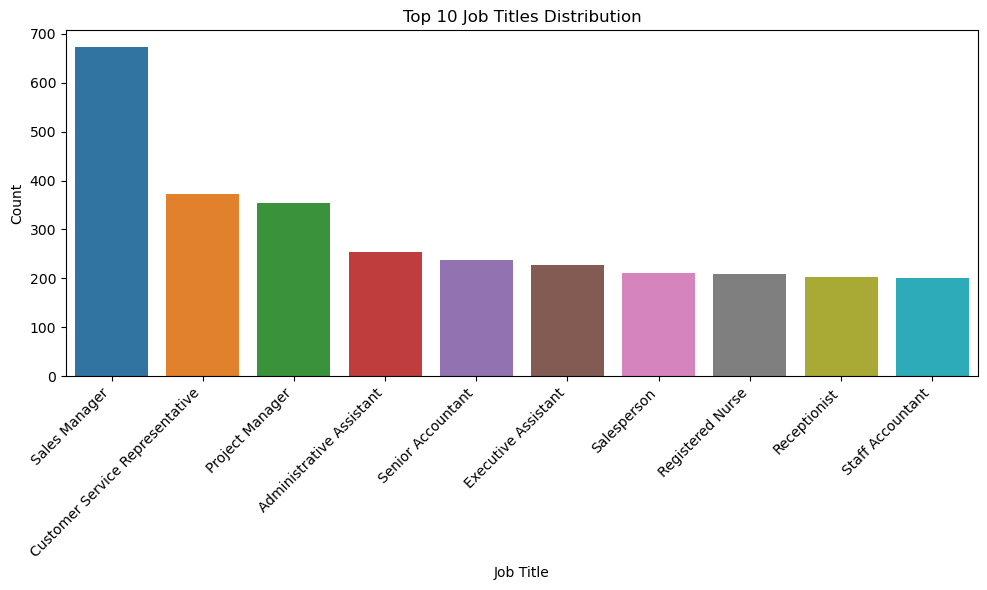

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 6))
sns.countplot(x='title', data=df, order=df['title'].value_counts().index[:10])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Job Titles Distribution')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.tight_layout()

##### 2.Company Distribution

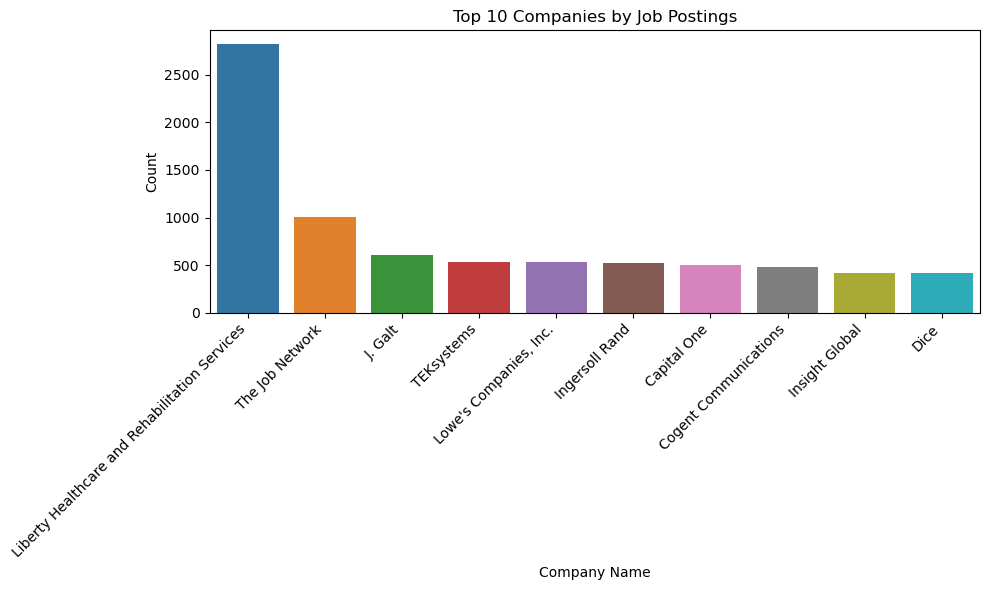

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(x='company_name', data=df, order=df['company_name'].value_counts().index[:10])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Companies by Job Postings')
plt.xlabel('Company Name')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


##### 3.Salary Distribution

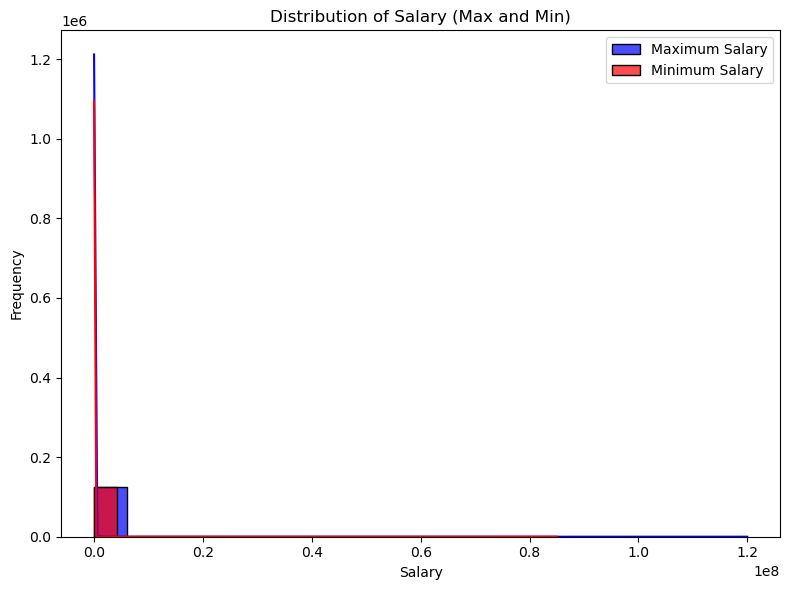

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(df['max_salary'], bins=20, kde=True, label='Maximum Salary', color='blue', alpha=0.7)
sns.histplot(df['min_salary'], bins=20, kde=True, label='Minimum Salary', color='red', alpha=0.7)
plt.title('Distribution of Salary (Max and Min)')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

##### 4.Location Distribution

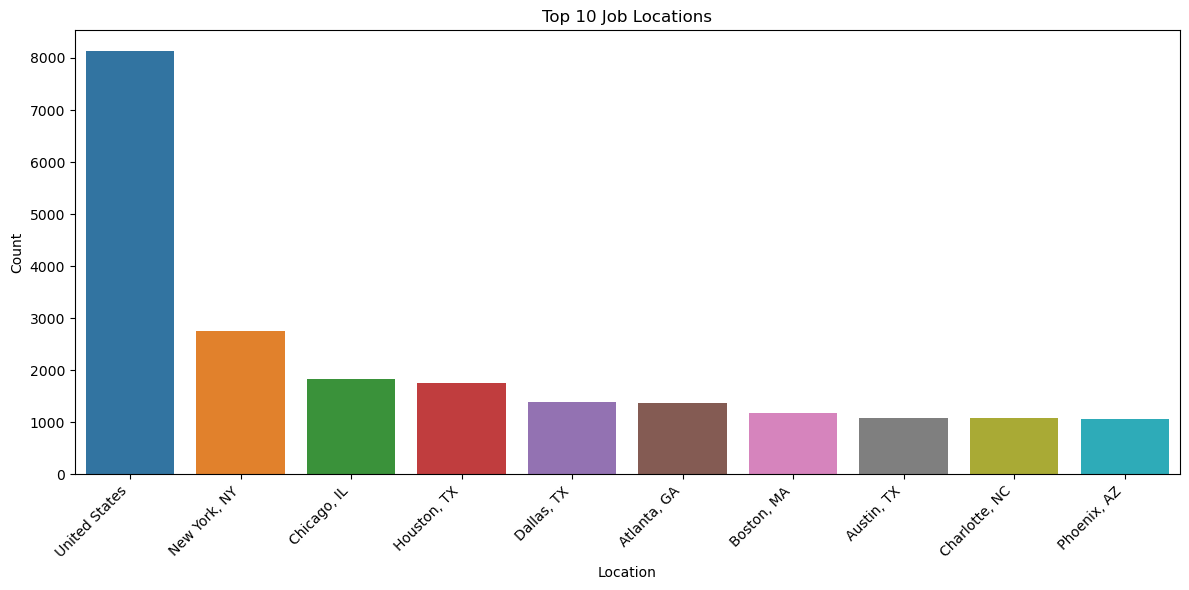

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(x='location', data=df, order=df['location'].value_counts().index[:10])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Job Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


##### 5.Work_Type Distribution

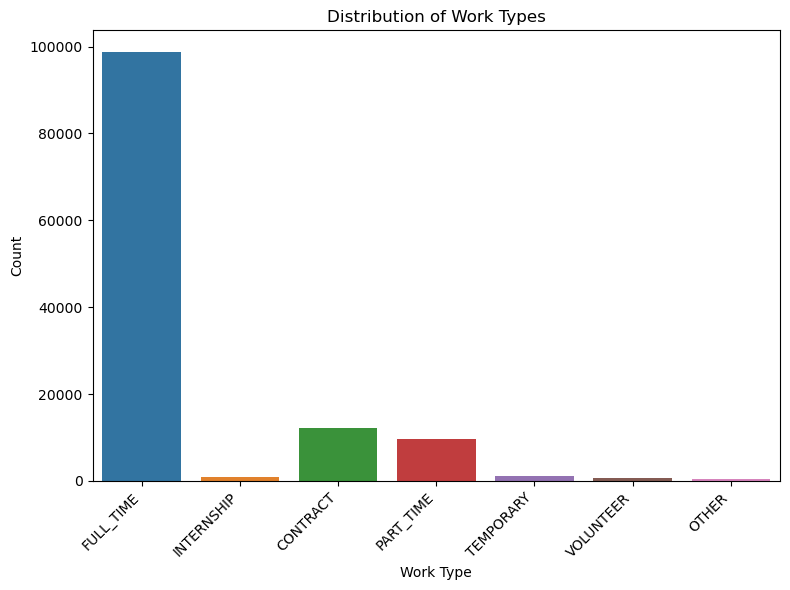

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(x='work_type', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Work Types')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


##### 6.Experience Level Distribution

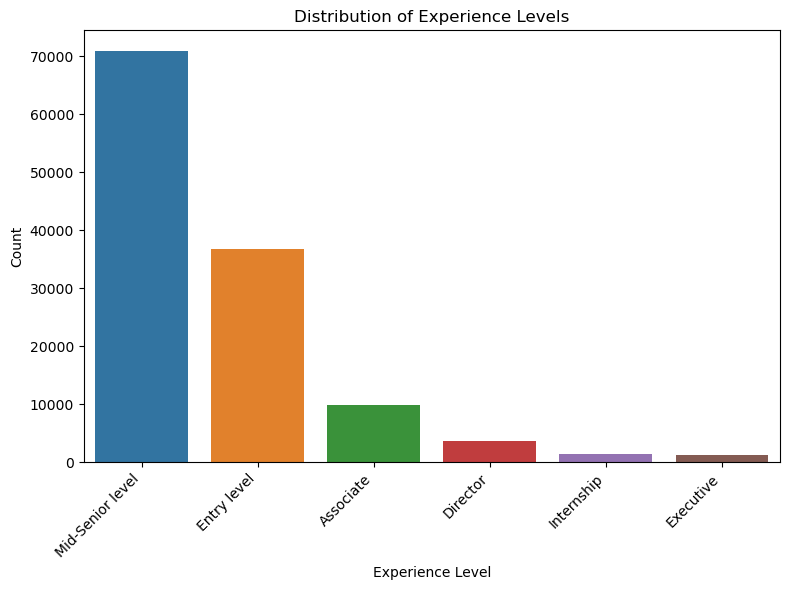

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(x='formatted_experience_level', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Experience Levels')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


##### 7.Application Type Distribution

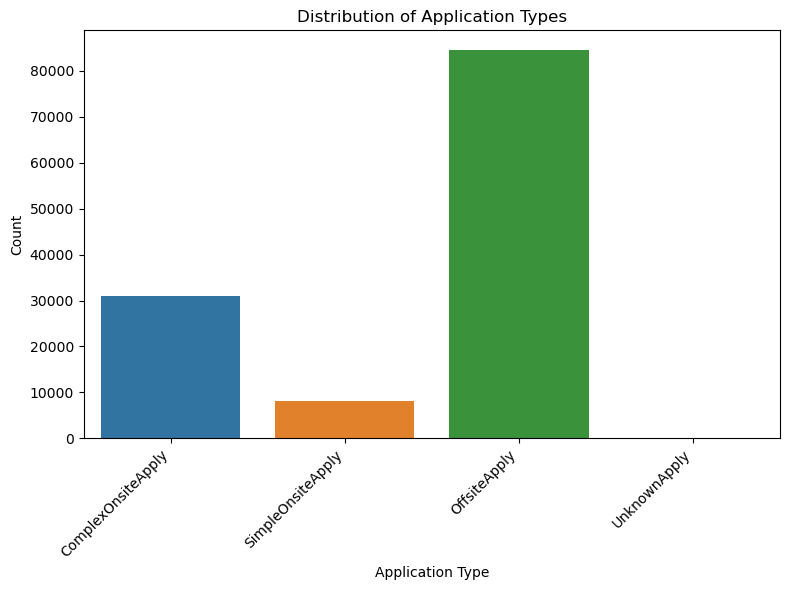

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(x='application_type', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Application Types')
plt.xlabel('Application Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


##### 8.Currency Distribution

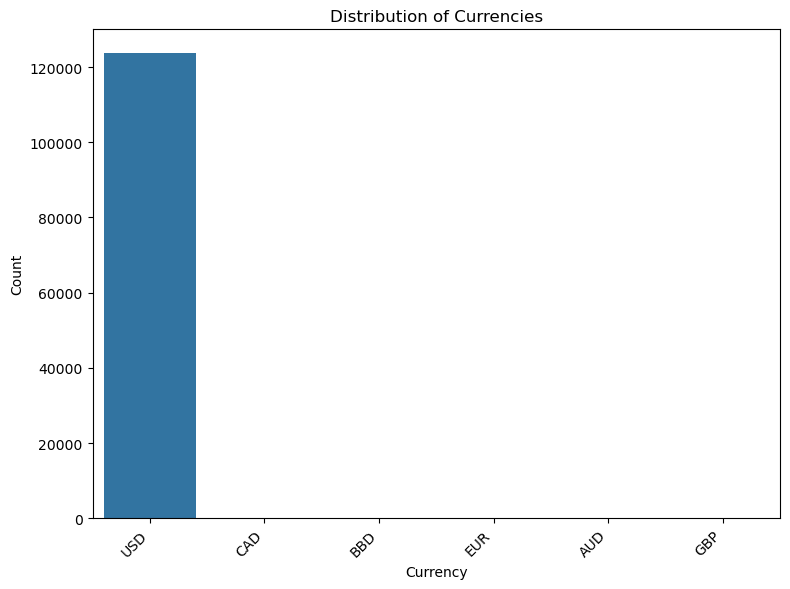

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(x='currency', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Currencies')
plt.xlabel('Currency')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [36]:
# Drop the 'currency' column sice it has no variablility its not adding more impact to our recomender system
df.drop(columns=['currency'], inplace=True)


### 3.2.Bivariet Analysis

##### 1.Top 20 Job Titles with Most Applications

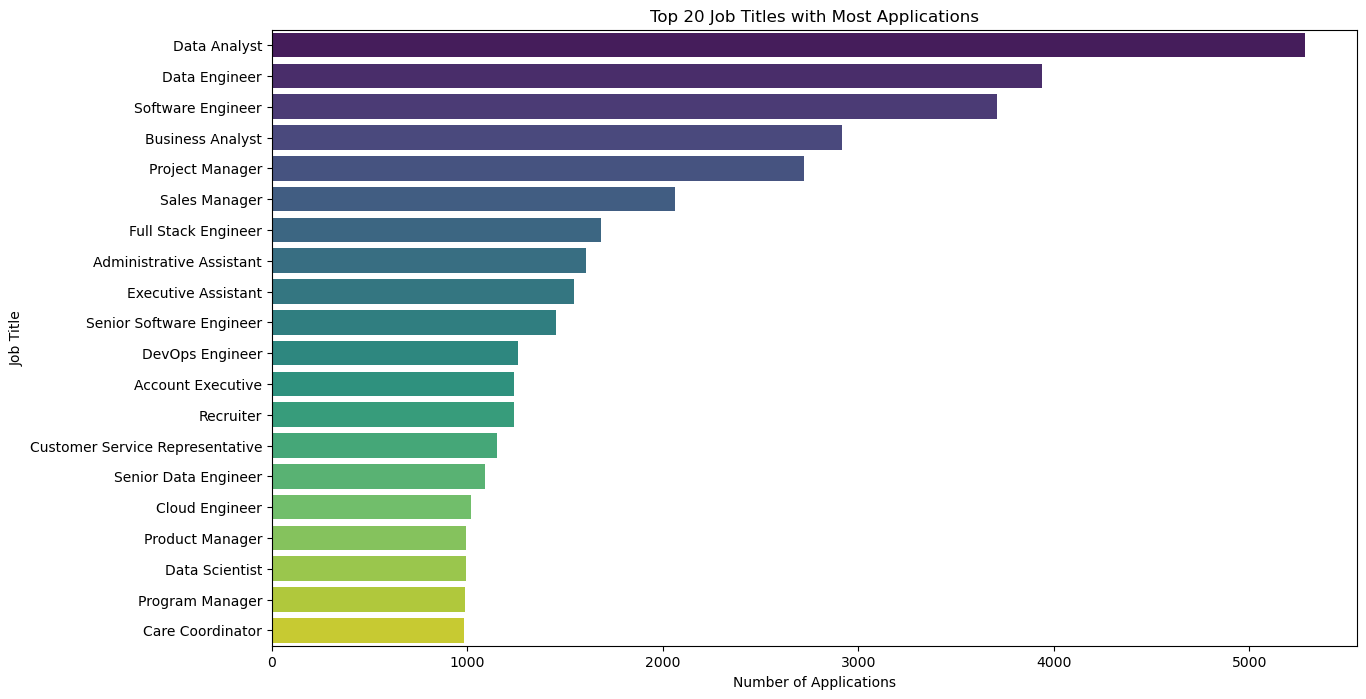

In [37]:
# Group by 'title' and sum the 'applies' column
title_applications = df.groupby('title')['applies'].sum().reset_index()

# Sort the results in descending order of applications
title_applications_sorted = title_applications.sort_values(by='applies', ascending=False)

# Select the top 10 job titles with the most applications
top_titles = title_applications_sorted.head(20)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(data=top_titles, x='applies', y='title', palette='viridis')
plt.title('Top 20 Job Titles with Most Applications')
plt.xlabel('Number of Applications')
plt.ylabel('Job Title')
plt.show()


##### 2.Pay Period vs Max_salary

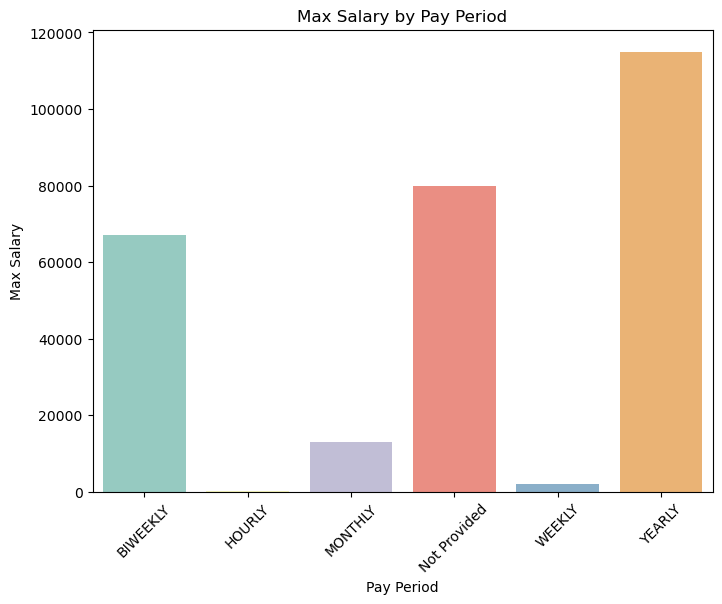

In [38]:
# Aggregate the data to get the median salary for each pay period
median_salary_by_pay_period = df.groupby('pay_period')['max_salary'].median().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=median_salary_by_pay_period, x='pay_period', y='max_salary', palette='Set3')
plt.title('Max Salary by Pay Period')
plt.xlabel('Pay Period')
plt.ylabel('Max Salary')
plt.xticks(rotation=45)
plt.show()


##### 3.Top 20 Job Titles with Most Views

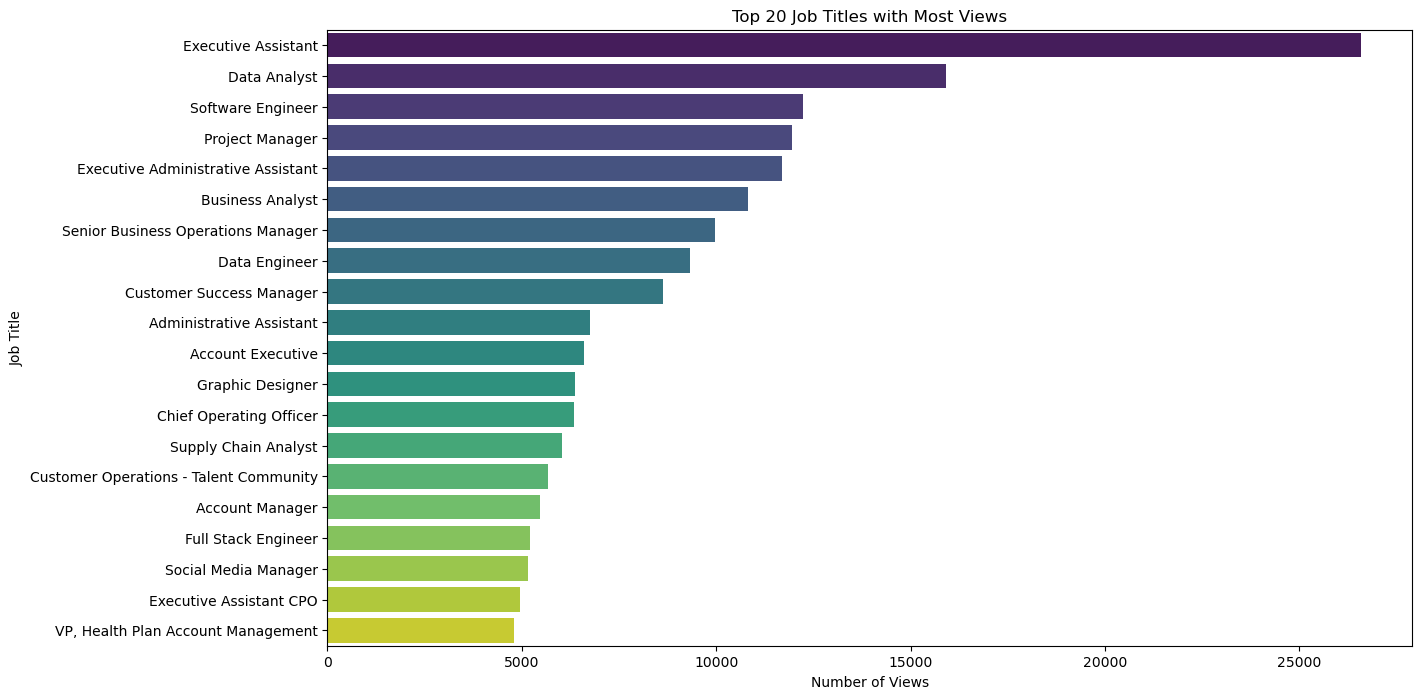

In [39]:
# Group by 'title' and sum the 'views' column
title_views = df.groupby('title')['views'].sum().reset_index()

# Sort the results in descending order of views
title_views_sorted = title_views.sort_values(by='views', ascending=False)

# Select the top 10 job titles with the most views
top_titles_views = title_views_sorted.head(20)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(data=top_titles_views, x='views', y='title', palette='viridis')
plt.title('Top 20 Job Titles with Most Views')
plt.xlabel('Number of Views')
plt.ylabel('Job Title')
plt.show()

##### 4.Bottom 20 Job Titles with Least Views

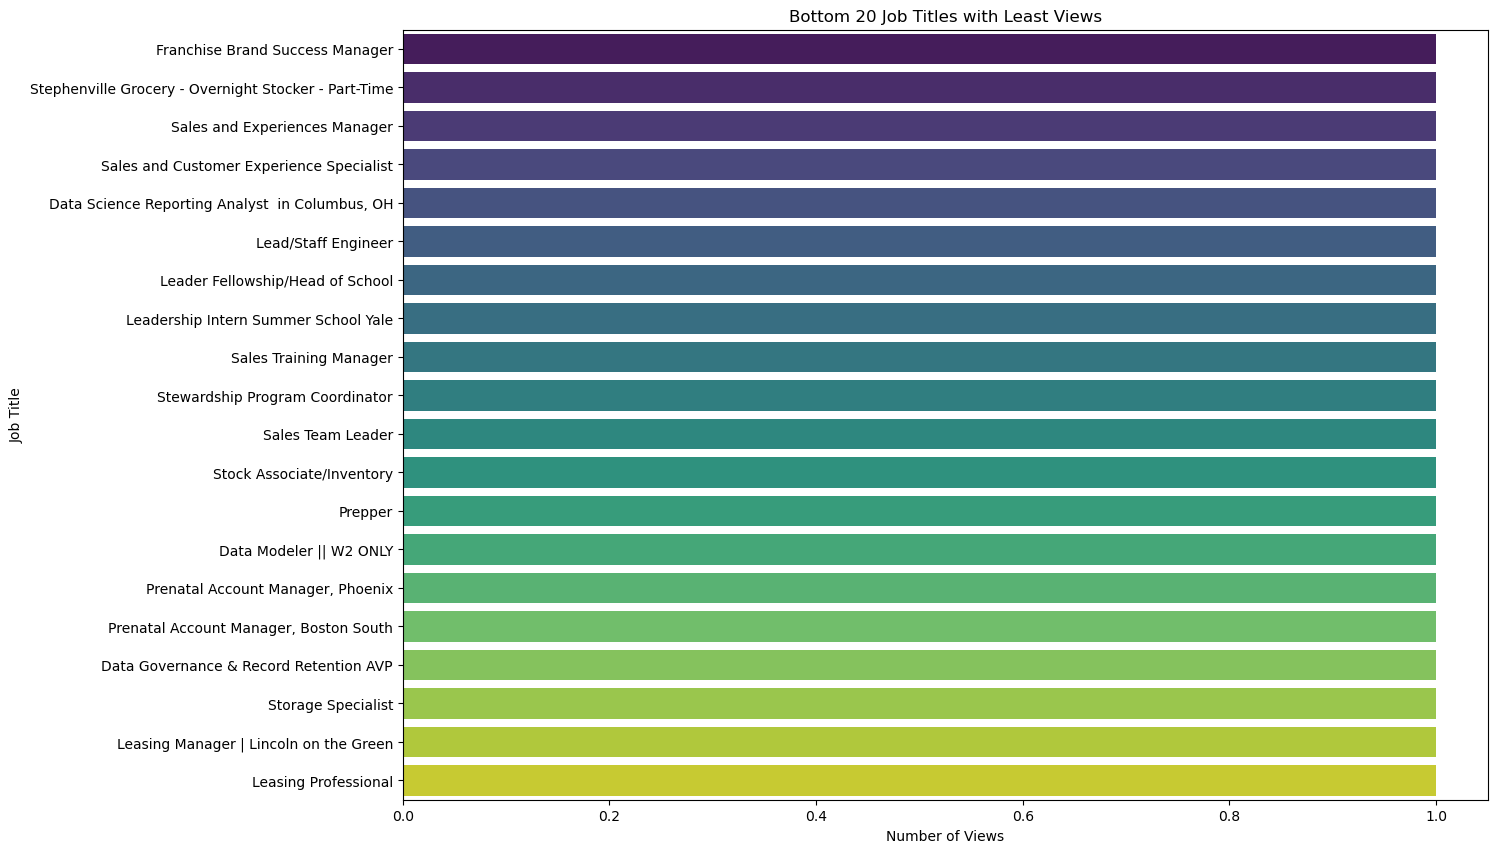

In [40]:
# Group by 'title' and sum the 'views' column
title_views = df.groupby('title')['views'].sum().reset_index()

# Sort the results in ascending order of views
title_views_sorted = title_views.sort_values(by='views', ascending=True)

# Select the bottom 20 job titles with the least views
bottom_titles_views = title_views_sorted.head(20)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(data=bottom_titles_views, x='views', y='title', palette='viridis')
plt.title('Bottom 20 Job Titles with Least Views')
plt.xlabel('Number of Views')
plt.ylabel('Job Title')
plt.show()


##### 5.Average Minimum and Maximum Salaries by Experience Level

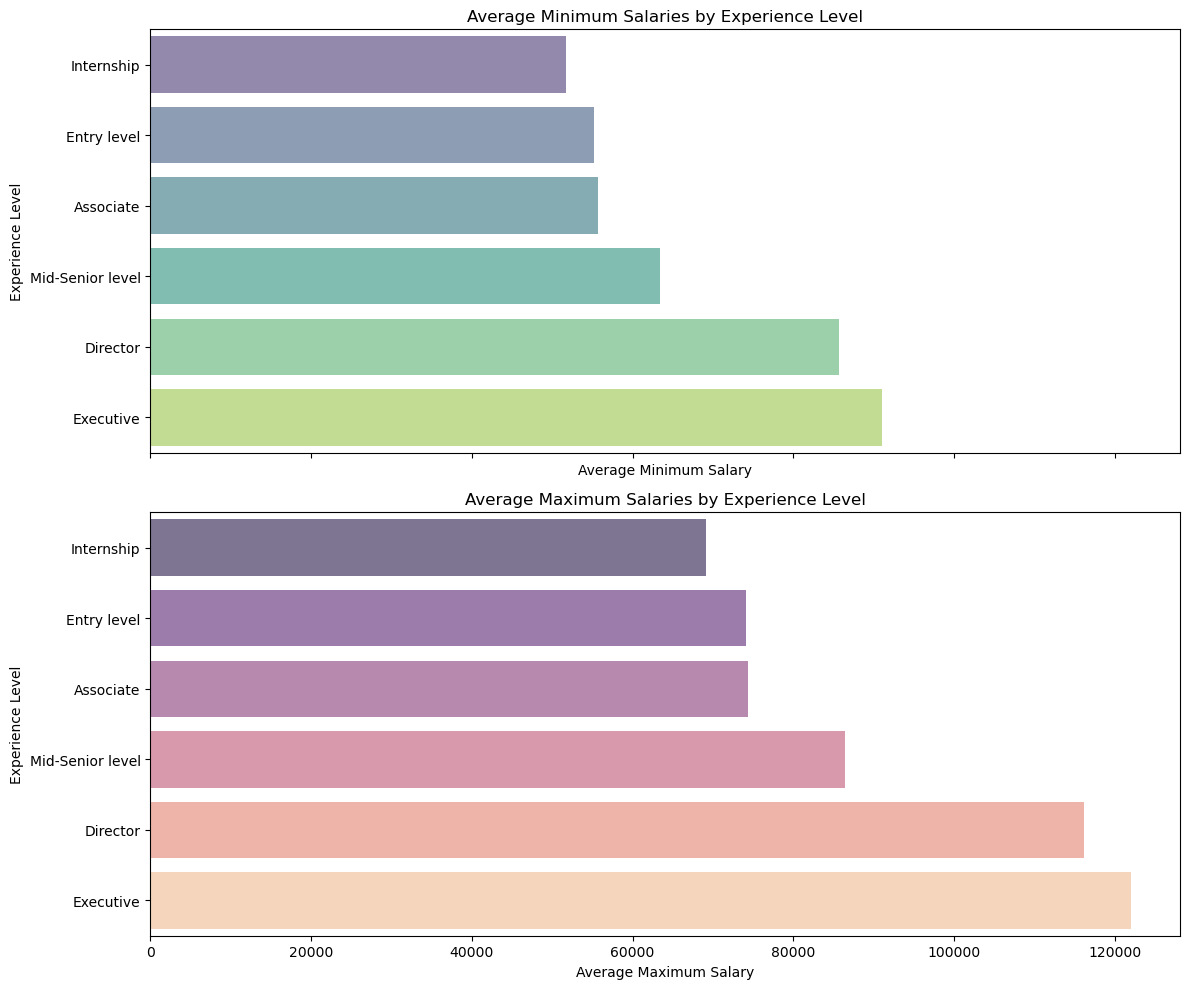

In [41]:

# Calculate average minimum and maximum salaries by experience level
average_salaries = df.groupby('formatted_experience_level')[['min_salary', 'max_salary']].mean().sort_values(by='min_salary')

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Create a bar plot for minimum salaries
sns.barplot(x=average_salaries['min_salary'], y=average_salaries.index, palette='viridis', ax=axs[0], alpha=0.6)
axs[0].set_title('Average Minimum Salaries by Experience Level')
axs[0].set_xlabel('Average Minimum Salary')
axs[0].set_ylabel('Experience Level')

# Create a bar plot for maximum salaries
sns.barplot(x=average_salaries['max_salary'], y=average_salaries.index, palette='magma', ax=axs[1], alpha=0.6)
axs[1].set_title('Average Maximum Salaries by Experience Level')
axs[1].set_xlabel('Average Maximum Salary')
axs[1].set_ylabel('Experience Level')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()

##### 6. Max Salary vs Min Salary by Experience level in Top Ten Companies

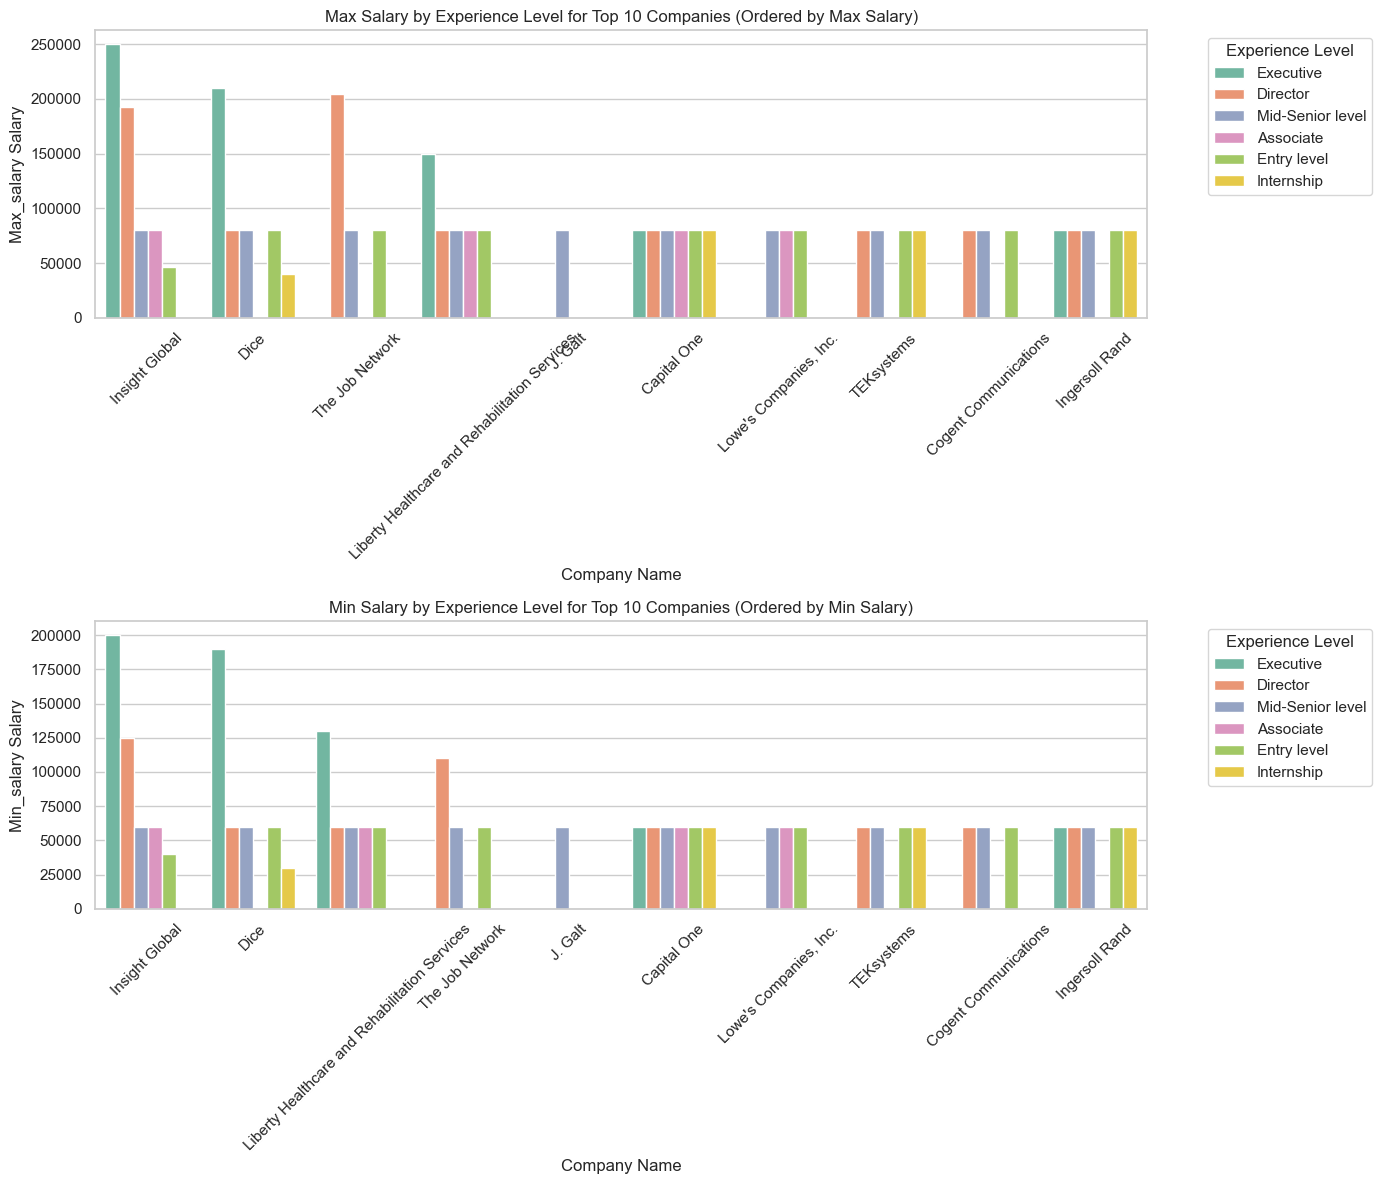

In [42]:
# Identify the top 10 companies by the number of job postings
top_companies = df['company_name'].value_counts().head(10).index

# Filter the DataFrame to include only these top companies
top_companies_df = df[df['company_name'].isin(top_companies)].copy()

# Ensure salaries are numeric
salary_columns = ['max_salary', 'min_salary']
top_companies_df.loc[:, salary_columns] = top_companies_df.loc[:, salary_columns].apply(pd.to_numeric, errors='coerce')

# Group by company and experience level, then calculate the median salary
grouped_df = top_companies_df.groupby(['company_name', 'formatted_experience_level'])[salary_columns].median().reset_index()

# Sort the DataFrame by max_salary in descending order
grouped_df_max = grouped_df.sort_values(by='max_salary', ascending=False)
# Sort the DataFrame by min_salary in descending order
grouped_df_min = grouped_df.sort_values(by='min_salary', ascending=False)

# Set the visual style of the plots
sns.set(style="whitegrid")

# Plot the results
plt.figure(figsize=(14, 12))

# Function to plot barplots
def plot_salary(df, salary_type, title, position):
    plt.subplot(2, 1, position)
    sns.barplot(data=df, x='company_name', y=salary_type, hue='formatted_experience_level', palette='Set2')
    plt.title(title)
    plt.xlabel('Company Name')
    plt.ylabel(salary_type.capitalize() + ' Salary')
    plt.xticks(rotation=45)
    plt.legend(title='Experience Level', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot max_salary
plot_salary(grouped_df_max, 'max_salary', 'Max Salary by Experience Level for Top 10 Companies (Ordered by Max Salary)', 1)

# Plot min_salary
plot_salary(grouped_df_min, 'min_salary', 'Min Salary by Experience Level for Top 10 Companies (Ordered by Min Salary)', 2)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


##### 7.Location vs Jop posting Metrics

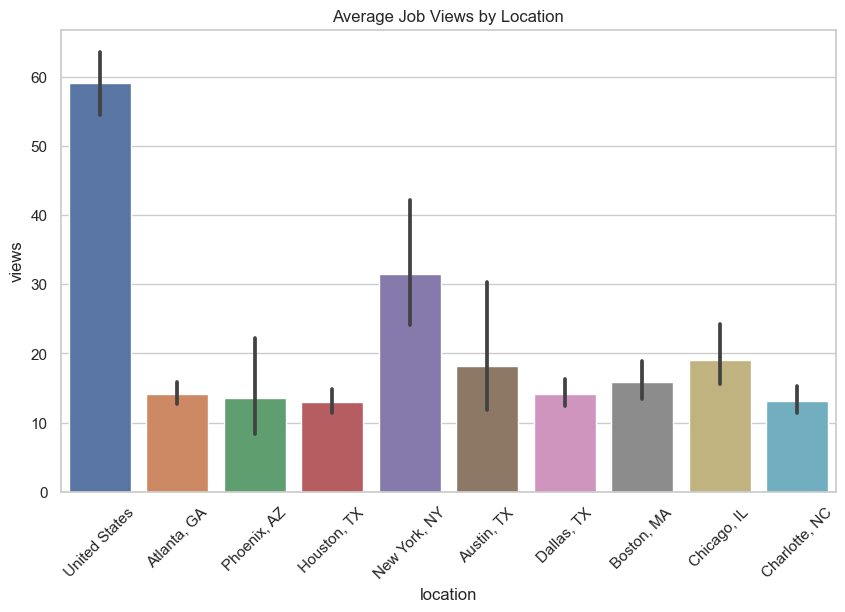

In [43]:
plt.figure(figsize=(10, 6))
top_locations = df['location'].value_counts().head(10).index
top_locations_df = df[df['location'].isin(top_locations)]

sns.barplot(data=top_locations_df, x='location', y='views', estimator=np.mean)
plt.title('Average Job Views by Location')
plt.xticks(rotation=45)
plt.show()

##### 8.Remote Allowed vs. Application Type

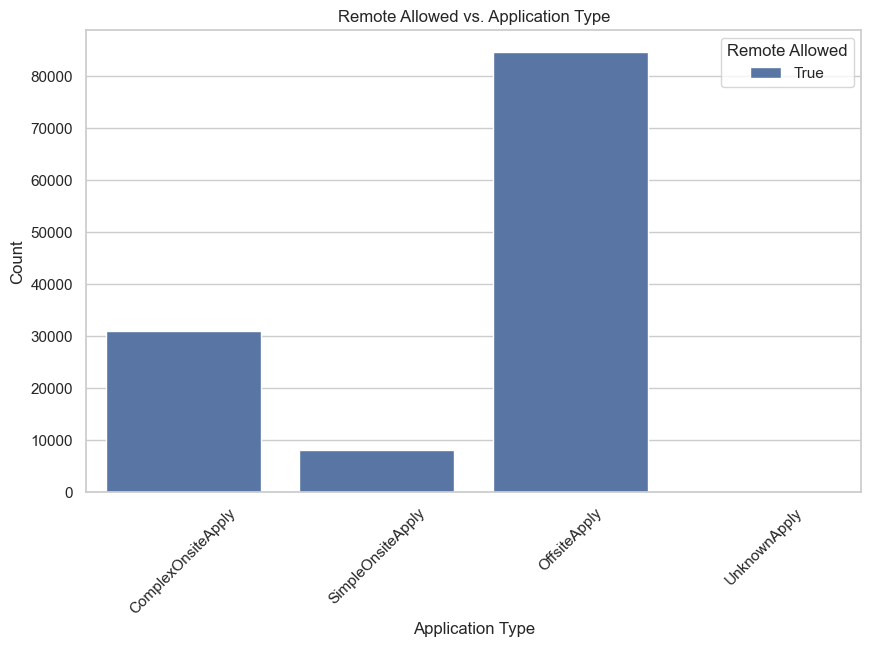

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='application_type', hue='remote_allowed')
plt.title('Remote Allowed vs. Application Type')
plt.xlabel('Application Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Remote Allowed')
plt.show()


##### 9.Average Max Salary by Work Type

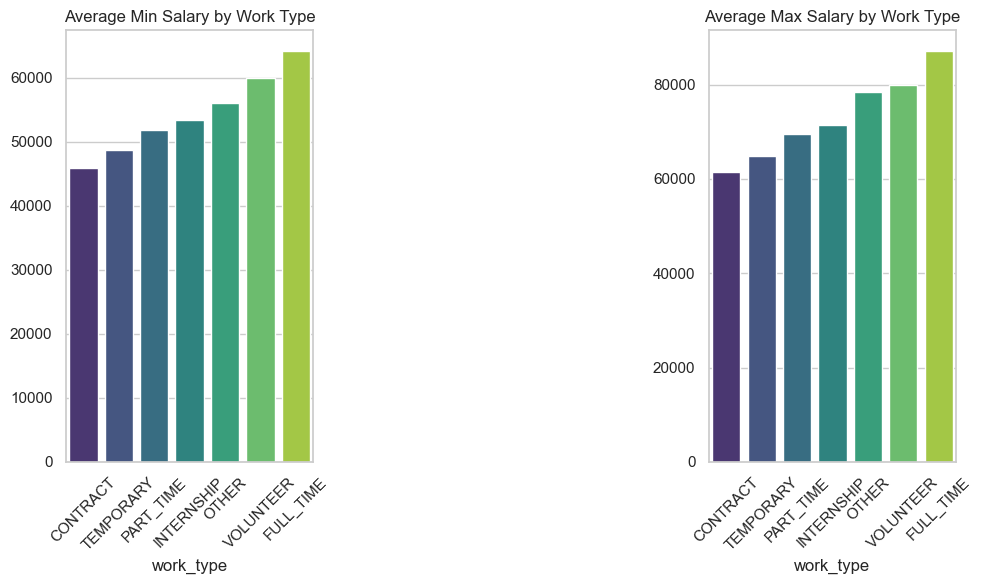

In [45]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
summary = df.groupby('work_type')['min_salary'].mean().sort_values()
sns.barplot(x=summary.index, y=summary.values, palette='viridis')
plt.title('Average Min Salary by Work Type')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
summary = df.groupby('work_type')['max_salary'].mean().sort_values()
sns.barplot(x=summary.index, y=summary.values, palette='viridis')
plt.title('Average Max Salary by Work Type')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


##### 10.Number of Skills vs. Applies'

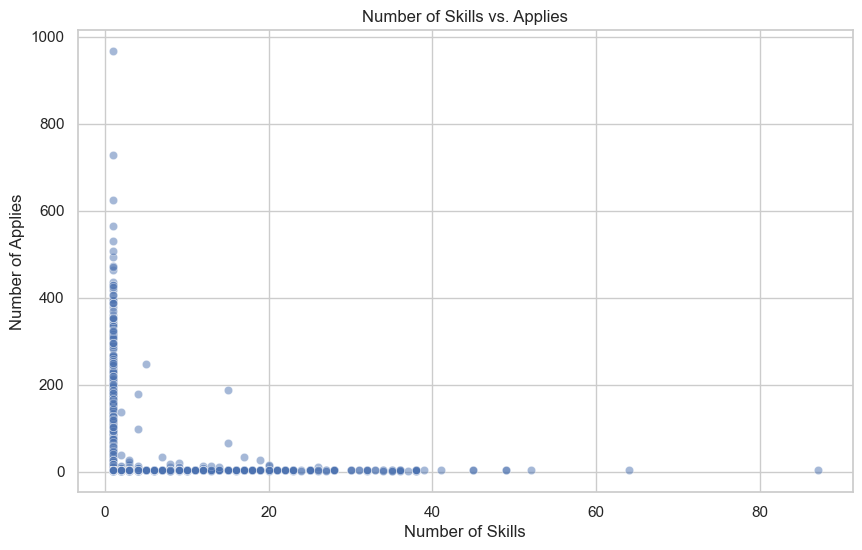

In [46]:
# Calculate the number of skills for each job posting
df['num_skills'] = df['skills_desc'].apply(lambda x: len(x.split(',')) if pd.notna(x) else 0)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='num_skills', y='applies', alpha=0.5)
plt.title('Number of Skills vs. Applies')
plt.xlabel('Number of Skills')
plt.ylabel('Number of Applies')
plt.show()

##### 11.Views vs. Applies

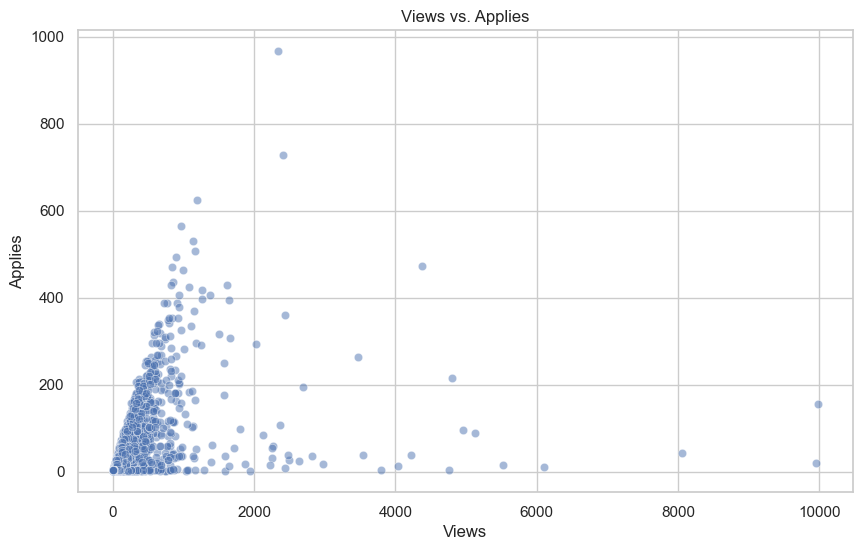

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='views', y='applies', alpha=0.5)
plt.title('Views vs. Applies')
plt.xlabel('Views')
plt.ylabel('Applies')
plt.show()

##### 12.Work Type by Remote Allowed

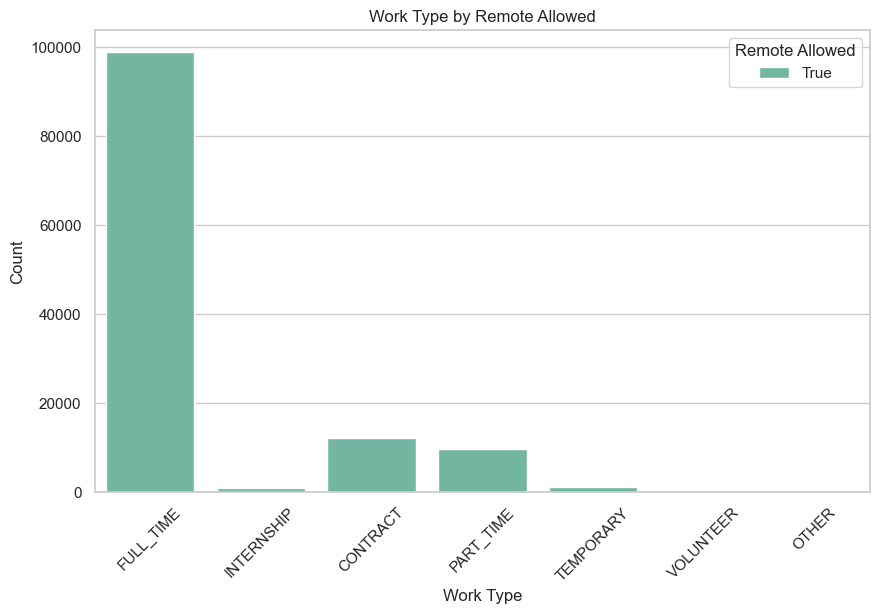

In [48]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='work_type', hue='remote_allowed', palette='Set2')
plt.title('Work Type by Remote Allowed')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Remote Allowed')
plt.show()

##### 13.Word Cloud of Job Titles

In [49]:
from wordcloud import WordCloud, STOPWORDS
#  additional stopwords for the three wordclouds below:

additional_stopwords = {"part", "time", "specialist", "HR","Hybrid", "Senior","Sr","Bonus", "Contract", "Entry",
                        "Day","perfom", "made","must", "experience","use","knowledge", "apply", "role", 
                        "employee", "change","application", "following","position", "requires","ability","skills",
                        "Level", "full" ,"NY" ,"rn" ,"2nd","Remote","Lead","II","United","provided","year", "will",
                        "system", "people", "able", "benefit","Strong","well", "job", "need","States","shift"}  

stopwords = set(STOPWORDS).union(additional_stopwords)


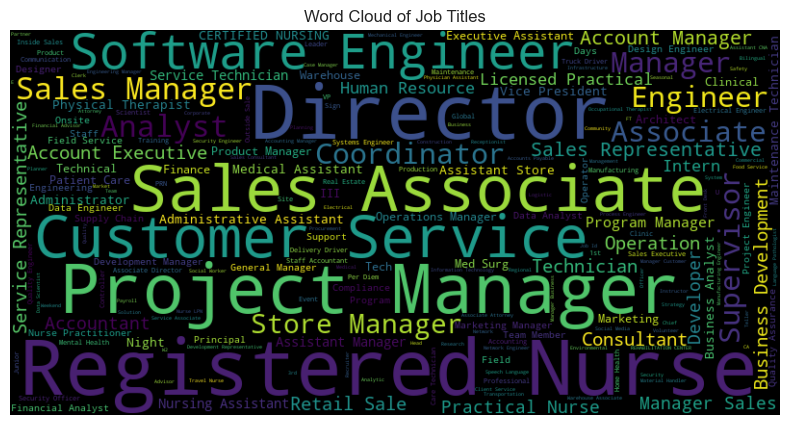

In [50]:
# Generatign a word cloud
wordcloud = WordCloud(stopwords=stopwords,width=800, height=400, background_color='black').generate(' '.join(df["title"]))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Job Titles')
plt.show()

##### 14.Word Cloud of Job location

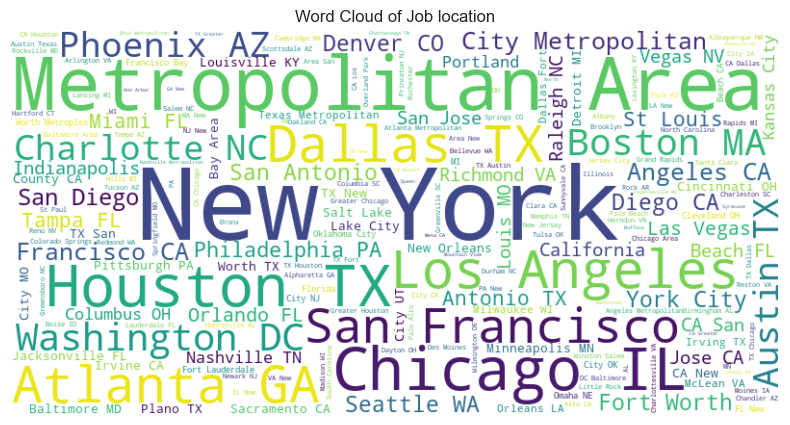

In [51]:
wordcloud = WordCloud(stopwords=stopwords,width=800, height=400, background_color='white').generate(' '.join(df["location"]))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Job location')
plt.show()

##### 15.Word Cloud of Skills Description

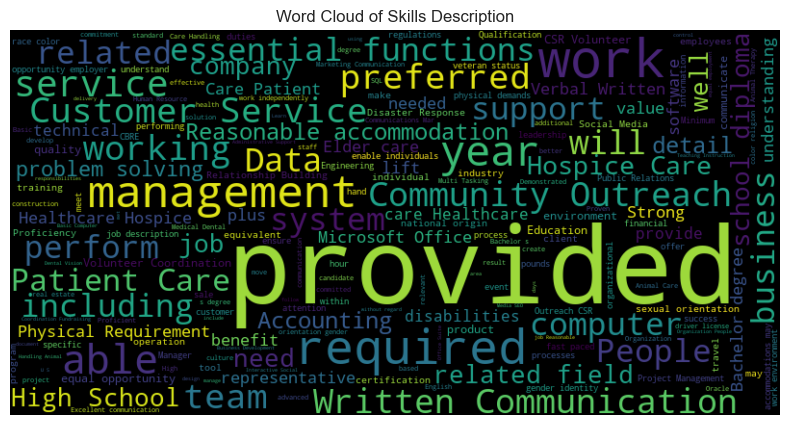

In [52]:
wordcloud = WordCloud(stopwords=stopwords,width=800, height=400, background_color='black').generate(' '.join(df["skills_desc"]))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Skills Description')
plt.show()

### Correlation Analysis

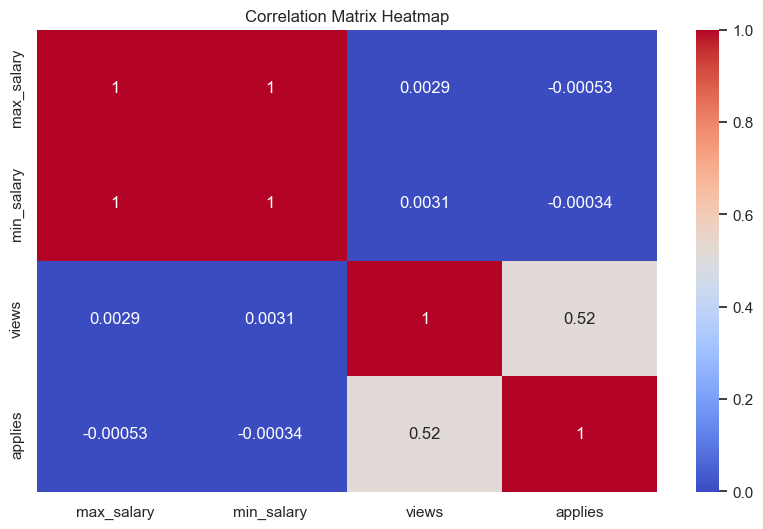

In [53]:
plt.figure(figsize=(10, 6))
correlation_matrix = df[['max_salary', 'min_salary', 'views', 'applies']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


In [54]:
# Pearson Correlation
correlation_matrix = df[['max_salary', 'min_salary', 'views', 'applies']].corr(method='pearson')
print(correlation_matrix)

# Spearman Rank Correlation
spearman_corr = df[['max_salary', 'min_salary', 'views', 'applies']].corr(method='spearman')
print(spearman_corr)


            max_salary  min_salary  views  applies
max_salary           1           1      0       -0
min_salary           1           1      0       -0
views                0           0      1        1
applies             -0          -0      1        1
            max_salary  min_salary  views  applies
max_salary           1           1      0        0
min_salary           1           1      0        0
views                0           0      1        0
applies              0           0      0        1


In [55]:
df.shape


(123849, 17)

In [56]:
df.columns

Index(['job_id', 'company_name', 'title', 'description', 'max_salary',
       'pay_period', 'location', 'views', 'min_salary', 'applies',
       'remote_allowed', 'application_type', 'formatted_experience_level',
       'skills_desc', 'listed_time', 'work_type', 'num_skills'],
      dtype='object')

####  Feature engineering

In [57]:
# Define thresholds and labels
salary_bins = [0, 50000, 100000, float('inf')]
salary_labels = ['low', 'medium', 'high']

# Create target variables
# Assuming 'filled_status' and 'hire_status' are derived from business rules
df['filled_status'] = np.where(data['views'] < 50, 0, 1)  #If views are less than 50, consider not filled
df['hire_status'] = np.where(data['applies'] > 20, 1, 0)  # If applies are more than 20, consider hired

# Salary Range Classification
df['salary_range'] = pd.cut((data['max_salary'] + data['min_salary']) / 2, bins=salary_bins, labels=salary_labels)

# Application Status
df['application_status'] = np.where(data['applies'] > 0, 'in_progress', 'not_started')

# Inspect the data to ensure target variables are created correctly
df[['filled_status', 'hire_status', 'salary_range', 'application_status']].head()

# skills description
df['skills_description'] = df['skills_desc'].fillna('') + ' ' + df['description'].fillna('')

# Convert 'listed_time' to datetime
df['listed_time'] = pd.to_datetime(df['listed_time'])

# Calculate the number of days since the job was listed
df['days_since_listing'] = (pd.Timestamp.now() - df['listed_time']).dt.days


### 4.Data Pre-Processing

##### 4.1.Encode Categorical Features

In [58]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoders
label_encoder_salary = LabelEncoder()
label_encoder_work_type = LabelEncoder()
label_encoder_pay_period = LabelEncoder()
label_encoder_application_type = LabelEncoder()

# Fit and transform the 'salary_range' column
df['salary_range_encoded'] = label_encoder_salary.fit_transform(df['salary_range'])

# Fit and transform the 'work_type' column
df['work_type_encoded'] = label_encoder_work_type.fit_transform(df['work_type'])

# Fit and transform the 'pay_period' column
df['pay_period_encoded'] = label_encoder_pay_period.fit_transform(df['pay_period'])

# Fit and transform the 'application_type' column
df['application_type_encoded'] = label_encoder_application_type.fit_transform(df['application_type'])


# Display the result
df[['salary_range', 'salary_range_encoded', 'work_type', 'work_type_encoded', 'pay_period', 'pay_period_encoded',
    'application_type', 'application_type_encoded']]


,salary_range,salary_range_encoded,work_type,work_type_encoded,pay_period,pay_period_encoded,application_type,application_type_encoded
0,low,1,FULL_TIME,1,HOURLY,1,ComplexOnsiteApply,0
1,low,1,FULL_TIME,1,HOURLY,1,ComplexOnsiteApply,0
2,medium,2,FULL_TIME,1,YEARLY,5,ComplexOnsiteApply,0
3,high,0,FULL_TIME,1,YEARLY,5,ComplexOnsiteApply,0
4,medium,2,FULL_TIME,1,YEARLY,5,ComplexOnsiteApply,0
...,...,...,...,...,...,...,...,...
123844,high,0,FULL_TIME,1,YEARLY,5,ComplexOnsiteApply,0
123845,medium,2,FULL_TIME,1,Not Provided,3,OffsiteApply,1
123846,medium,2,FULL_TIME,1,Not Provided,3,OffsiteApply,1
123847,medium,2,FULL_TIME,1,Not Provided,3,ComplexOnsiteApply,0


##### 4.2.Handle Binary Features

In [59]:
from sklearn.compose import ColumnTransformer

# Convert binary columns
binary_columns = ['remote_allowed', 'filled_status', 'hire_status']
df[binary_columns] = df[binary_columns].replace({'yes': 1, 'no': 0})
df

,job_id,company_name,title,description,max_salary,pay_period,location,views,min_salary,applies,...,filled_status,hire_status,salary_range,application_status,skills_description,days_since_listing,salary_range_encoded,work_type_encoded,pay_period_encoded,application_type_encoded
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20,HOURLY,"Princeton, NJ",20,17,2,...,0,0,low,in_progress,Requirements: \n\nWe are seeking a College or ...,19930,1,1,1,0
1,1829192,Liberty Healthcare and Rehabilitation Services,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50,HOURLY,"Fort Collins, CO",1,30,3,...,0,0,low,in_progress,No skills provided At Aspen Therapy and Wellne...,19930,1,1,1,0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,"65,000",YEARLY,"Cincinnati, OH",8,"45,000",3,...,0,0,medium,in_progress,We are currently accepting resumes for FOH - A...,19930,2,1,5,0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,"175,000",YEARLY,"New Hyde Park, NY",16,"140,000",3,...,0,0,high,in_progress,This position requires a baseline understandin...,19930,0,1,5,0
4,35982263,Liberty Healthcare and Rehabilitation Services,Service Technician,Looking for HVAC service tech with experience ...,"80,000",YEARLY,"Burlington, IA",3,"60,000",3,...,0,0,medium,in_progress,No skills provided Looking for HVAC service te...,19930,2,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123844,3906267117,Lozano Smith,Title IX/Investigations Attorney,Our Walnut Creek office is currently seeking a...,"195,000",YEARLY,"Walnut Creek, CA",1,"120,000",3,...,0,0,high,in_progress,No skills provided Our Walnut Creek office is ...,19930,0,1,5,0
123845,3906267126,Pinterest,"Staff Software Engineer, ML Serving Platform",About Pinterest:\n\nMillions of people across ...,"80,000",Not Provided,United States,3,"60,000",3,...,0,0,medium,in_progress,No skills provided About Pinterest:\n\nMillion...,19930,2,1,3,1
123846,3906267131,EPS Learning,"Account Executive, Oregon/Washington",Company Overview\n\nEPS Learning is a leading ...,"80,000",Not Provided,"Spokane, WA",3,"60,000",3,...,0,0,medium,in_progress,No skills provided Company Overview\n\nEPS Lea...,19930,2,1,3,1
123847,3906267195,Trelleborg Applied Technologies,Business Development Manager,The Business Development Manager is a 'hunter'...,"80,000",Not Provided,"Texas, United States",4,"60,000",3,...,0,0,medium,in_progress,No skills provided The Business Development Ma...,19930,2,1,3,0


##### 4.3.Standardise Numerical Features

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['days_since_listing'] = scaler.fit_transform(df[['days_since_listing']])
df

,job_id,company_name,title,description,max_salary,pay_period,location,views,min_salary,applies,...,filled_status,hire_status,salary_range,application_status,skills_description,days_since_listing,salary_range_encoded,work_type_encoded,pay_period_encoded,application_type_encoded
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20,HOURLY,"Princeton, NJ",20,17,2,...,0,0,low,in_progress,Requirements: \n\nWe are seeking a College or ...,0,1,1,1,0
1,1829192,Liberty Healthcare and Rehabilitation Services,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50,HOURLY,"Fort Collins, CO",1,30,3,...,0,0,low,in_progress,No skills provided At Aspen Therapy and Wellne...,0,1,1,1,0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,"65,000",YEARLY,"Cincinnati, OH",8,"45,000",3,...,0,0,medium,in_progress,We are currently accepting resumes for FOH - A...,0,2,1,5,0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,"175,000",YEARLY,"New Hyde Park, NY",16,"140,000",3,...,0,0,high,in_progress,This position requires a baseline understandin...,0,0,1,5,0
4,35982263,Liberty Healthcare and Rehabilitation Services,Service Technician,Looking for HVAC service tech with experience ...,"80,000",YEARLY,"Burlington, IA",3,"60,000",3,...,0,0,medium,in_progress,No skills provided Looking for HVAC service te...,0,2,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123844,3906267117,Lozano Smith,Title IX/Investigations Attorney,Our Walnut Creek office is currently seeking a...,"195,000",YEARLY,"Walnut Creek, CA",1,"120,000",3,...,0,0,high,in_progress,No skills provided Our Walnut Creek office is ...,0,0,1,5,0
123845,3906267126,Pinterest,"Staff Software Engineer, ML Serving Platform",About Pinterest:\n\nMillions of people across ...,"80,000",Not Provided,United States,3,"60,000",3,...,0,0,medium,in_progress,No skills provided About Pinterest:\n\nMillion...,0,2,1,3,1
123846,3906267131,EPS Learning,"Account Executive, Oregon/Washington",Company Overview\n\nEPS Learning is a leading ...,"80,000",Not Provided,"Spokane, WA",3,"60,000",3,...,0,0,medium,in_progress,No skills provided Company Overview\n\nEPS Lea...,0,2,1,3,1
123847,3906267195,Trelleborg Applied Technologies,Business Development Manager,The Business Development Manager is a 'hunter'...,"80,000",Not Provided,"Texas, United States",4,"60,000",3,...,0,0,medium,in_progress,No skills provided The Business Development Ma...,0,2,1,3,0


##### 4.4.Text Columns Preprocessing

In [61]:
# using nlp to convert text data

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Initialize lemmatizer and stopwords list
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Define text preprocessing function
def preprocess_text(text):
    if isinstance(text, str):  # Ensure the text is a string
        tokens = word_tokenize(text.lower())  # Tokenize and lower case
        tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]
        return ' '.join(tokens)
    return text  # Return text as is if it's not a string

# Specify the columns to preprocess
text_columns = ['company_name', 'title', 'pay_period', 'location', 'skills_description','formatted_experience_level']

# Apply preprocessing to the specified columns
for column in text_columns:
        df[f'processed_{column}'] = df[column].apply(preprocess_text)

# Display the preprocessed DataFrame
df


,job_id,company_name,title,description,max_salary,pay_period,location,views,min_salary,applies,...,salary_range_encoded,work_type_encoded,pay_period_encoded,application_type_encoded,processed_company_name,processed_title,processed_pay_period,processed_location,processed_skills_description,processed_formatted_experience_level
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20,HOURLY,"Princeton, NJ",20,17,2,...,1,1,1,0,corcoran sawyer smith,marketing coordinator,hourly,princeton nj,requirement seeking college graduate student a...,level
1,1829192,Liberty Healthcare and Rehabilitation Services,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50,HOURLY,"Fort Collins, CO",1,30,3,...,1,1,1,0,liberty healthcare rehabilitation service,mental health,hourly,fort collins co,skill provided aspen therapy wellness committe...,level
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,"65,000",YEARLY,"Cincinnati, OH",8,"45,000",3,...,2,1,5,0,national exemplar,assitant restaurant manager,yearly,cincinnati oh,currently accepting resume foh asisstant resta...,level
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,"175,000",YEARLY,"New Hyde Park, NY",16,"140,000",3,...,0,1,5,0,abrams fensterman llp,senior elder law trust estate associate attorney,yearly,new hyde park ny,position requires baseline understanding onlin...,level
4,35982263,Liberty Healthcare and Rehabilitation Services,Service Technician,Looking for HVAC service tech with experience ...,"80,000",YEARLY,"Burlington, IA",3,"60,000",3,...,2,1,5,0,liberty healthcare rehabilitation service,service technician,yearly,burlington ia,skill provided looking hvac service tech exper...,level
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123844,3906267117,Lozano Smith,Title IX/Investigations Attorney,Our Walnut Creek office is currently seeking a...,"195,000",YEARLY,"Walnut Creek, CA",1,"120,000",3,...,0,1,5,0,lozano smith,title attorney,yearly,walnut creek ca,skill provided walnut creek office currently s...,level
123845,3906267126,Pinterest,"Staff Software Engineer, ML Serving Platform",About Pinterest:\n\nMillions of people across ...,"80,000",Not Provided,United States,3,"60,000",3,...,2,1,3,1,pinterest,staff software engineer ml serving platform,provided,united state,skill provided pinterest million people across...,level
123846,3906267131,EPS Learning,"Account Executive, Oregon/Washington",Company Overview\n\nEPS Learning is a leading ...,"80,000",Not Provided,"Spokane, WA",3,"60,000",3,...,2,1,3,1,eps learning,account executive,provided,spokane wa,skill provided company overview eps learning l...,level
123847,3906267195,Trelleborg Applied Technologies,Business Development Manager,The Business Development Manager is a 'hunter'...,"80,000",Not Provided,"Texas, United States",4,"60,000",3,...,2,1,3,0,trelleborg applied technology,business development manager,provided,texas united state,skill provided business development manager ca...,level


##### 4.5.Dropping columns

In [62]:
# Drop original columns that have been engineered or are no longer needed
columns_to_drop = ['views','job_id','applies','listed_time','max_salary', 'min_salary','skills_desc',
                   'pay_period','formatted_experience_level','description',
                   'num_skills','salary_range','location','company_name','title']
df_cleaned = df.drop(columns=columns_to_drop)
df = df_cleaned
df

,remote_allowed,application_type,work_type,filled_status,hire_status,application_status,skills_description,days_since_listing,salary_range_encoded,work_type_encoded,pay_period_encoded,application_type_encoded,processed_company_name,processed_title,processed_pay_period,processed_location,processed_skills_description,processed_formatted_experience_level
0,True,ComplexOnsiteApply,FULL_TIME,0,0,in_progress,Requirements: \n\nWe are seeking a College or ...,0,1,1,1,0,corcoran sawyer smith,marketing coordinator,hourly,princeton nj,requirement seeking college graduate student a...,level
1,True,ComplexOnsiteApply,FULL_TIME,0,0,in_progress,No skills provided At Aspen Therapy and Wellne...,0,1,1,1,0,liberty healthcare rehabilitation service,mental health,hourly,fort collins co,skill provided aspen therapy wellness committe...,level
2,True,ComplexOnsiteApply,FULL_TIME,0,0,in_progress,We are currently accepting resumes for FOH - A...,0,2,1,5,0,national exemplar,assitant restaurant manager,yearly,cincinnati oh,currently accepting resume foh asisstant resta...,level
3,True,ComplexOnsiteApply,FULL_TIME,0,0,in_progress,This position requires a baseline understandin...,0,0,1,5,0,abrams fensterman llp,senior elder law trust estate associate attorney,yearly,new hyde park ny,position requires baseline understanding onlin...,level
4,True,ComplexOnsiteApply,FULL_TIME,0,0,in_progress,No skills provided Looking for HVAC service te...,0,2,1,5,0,liberty healthcare rehabilitation service,service technician,yearly,burlington ia,skill provided looking hvac service tech exper...,level
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123844,True,ComplexOnsiteApply,FULL_TIME,0,0,in_progress,No skills provided Our Walnut Creek office is ...,0,0,1,5,0,lozano smith,title attorney,yearly,walnut creek ca,skill provided walnut creek office currently s...,level
123845,True,OffsiteApply,FULL_TIME,0,0,in_progress,No skills provided About Pinterest:\n\nMillion...,0,2,1,3,1,pinterest,staff software engineer ml serving platform,provided,united state,skill provided pinterest million people across...,level
123846,True,OffsiteApply,FULL_TIME,0,0,in_progress,No skills provided Company Overview\n\nEPS Lea...,0,2,1,3,1,eps learning,account executive,provided,spokane wa,skill provided company overview eps learning l...,level
123847,True,ComplexOnsiteApply,FULL_TIME,0,0,in_progress,No skills provided The Business Development Ma...,0,2,1,3,0,trelleborg applied technology,business development manager,provided,texas united state,skill provided business development manager ca...,level


In [63]:
df.columns

Index(['remote_allowed', 'application_type', 'work_type', 'filled_status',
       'hire_status', 'application_status', 'skills_description',
       'days_since_listing', 'salary_range_encoded', 'work_type_encoded',
       'pay_period_encoded', 'application_type_encoded',
       'processed_company_name', 'processed_title', 'processed_pay_period',
       'processed_location', 'processed_skills_description',
       'processed_formatted_experience_level'],
      dtype='object')

### 5.Modelling

### Feature Selection

#### 1.Classification Models

In [74]:
feature_columns = [
    'remote_allowed', 'work_type_encoded','salary_range_encoded', 'pay_period_encoded','days_since_listing']


In [75]:
import os

# Set environment variable to limit number of CPU cores
os.environ['LOKY_MAX_CPU_COUNT'] = '4'


#### 1.Job Filled Status Predictor

In [76]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score



# Define target variable y
# Convert categorical variables to dummy variables
X = pd.get_dummies(df[feature_columns], drop_first=True)  # Drop the first to avoid multicollinearity
y = df['filled_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Define resampling methods
over = SMOTE(random_state=42)
under = RandomUnderSampler(random_state=42)
pipeline = Pipeline(steps=[('o', over), ('u', under)])

# Apply resampling
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)


# Create and train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [77]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Example variables
y_true = [0, 1, 2, 2, 1, 0]
y_pred = [0, 0, 2, 2, 2, 0]

# Calculate precision, recall, and f1-score
precision = precision_score(y_true, y_pred, average='macro', zero_division=0)
recall = recall_score(y_true, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Filled Status Prediction Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     35391
           1       0.00      0.00      0.00      1764

    accuracy                           0.95     37155
   macro avg       0.48      0.50      0.49     37155
weighted avg       0.91      0.95      0.93     37155

Confusion Matrix:
 [[35391     0]
 [ 1764     0]]


C:\Users\Caro\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Caro\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Caro\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

ROC AUC Score: 0.6890506595864495


#### 2.Salary Range Classification

In [78]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report


# Convert categorical variables to dummy variables
X = pd.get_dummies(df[feature_columns], drop_first=True)  # Drop the first to avoid multicollinearity
# Define target variable
y = df['salary_range_encoded'] 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define resampling methods
over = SMOTE(random_state=42)
under = RandomUnderSampler(random_state=42)
pipeline = Pipeline(steps=[('o', over), ('u', under)])

# Apply resampling
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

# Create and train the model
model = GradientBoostingClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

GradientBoostingClassifier(random_state=42)

In [79]:
# Predict and evaluate
y_pred = model.predict(X_test)
print("Salary Range Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

if hasattr(model, "predict_proba"):
    print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr'))
else:
    print("ROC AUC Score is not available for this model.")

Salary Range Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2991
           1       1.00      1.00      1.00      3598
           2       1.00      1.00      1.00     30566

    accuracy                           1.00     37155
   macro avg       1.00      1.00      1.00     37155
weighted avg       1.00      1.00      1.00     37155

Confusion Matrix:
 [[ 2991     0     0]
 [    0  3598     0]
 [    0     0 30566]]
ROC AUC Score: 1.0


#### 3.Hire Status Prediction

In [80]:
!pip install xgboost


Defaulting to user installation because normal site-packages is not writeable


In [81]:
import xgboost as xgb
from xgboost import XGBClassifier

# Convert categorical variables to dummy variables
X = pd.get_dummies(df[feature_columns], drop_first=True)  # Drop the first to avoid multicollinearity
y = df['hire_status']  # Assuming you are classifying hire_status

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define resampling methods
over = SMOTE(random_state=42)
under = RandomUnderSampler(random_state=42)
pipeline = Pipeline(steps=[('o', over), ('u', under)])

# Apply resampling
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

# Create and train the XGBoost model
model = XGBClassifier(eval_metric='logloss', random_state=42)


In [82]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'scale_pos_weight': [1, 10, 25]
}

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)

# Best model from grid search
best_model = grid_search.best_estimator_

In [ ]:
# Predict and evaluate
y_pred = model.predict(X_test)
print("Salary Range Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

if hasattr(model, "predict_proba"):
    print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr'))
else:
    print("ROC AUC Score is not available for this model.")

#### 2.Recommender Systems Models.

#### NLP PIPELINE

Next is building the pipeline that does

*   Text Similarity
*   Named Entity Recognition
*   Topic Extraction
*   Keyword Extraction

In [84]:
def nlp_pipeline(texts):
    processed_texts = [preprocess_text(text) for text in texts]

    # Text Similarity
    similarities = []
    for i in range(len(processed_texts)):
        for j in range(i+1, len(processed_texts)):
            similarity = compute_text_similarity(processed_texts[i], processed_texts[j])
            similarities.append((texts[i], texts[j], similarity))

    # Named Entity Recognition
    entities = []
    for text in processed_texts:
        entities.append(extract_named_entities(text))

    # entities = [extract_named_entities(text) for text in texts]

    # Topic Extraction
    topics = []
    for text in processed_texts:
      topics = extract_topics(processed_texts)

    # Keyword Extraction
    keywords = []
    for text in processed_texts:
      keywords = [extract_keywords(text) for text in texts]
    
    return {
        "similarities": similarities,
        "entities": entities,
        "topics": topics,
        "keywords": keywords
    }

#####  1.Content based Filtering

In [117]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

# Vectorize job descriptions using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['processed_skills_description'])

# Train a content-based recommender using Nearest Neighbors
model = NearestNeighbors(metric='cosine', algorithm='brute')
model.fit(X)

NearestNeighbors(algorithm='brute', metric='cosine')

In [118]:

# Function to recommend jobs based on a job description
def recommend_jobs(job_description, n_recommendations=5):
    query_index = df[df['skills_description'].str.contains(job_description, na=False)].index[0]
    distances, indices = model.kneighbors(X[query_index:query_index+1], n_neighbors=n_recommendations+1)
    return df.iloc[indices[0][1:]]

# Example recommendation
job_description = "Data Scientist"
recommended_jobs = recommend_jobs(job_description)
recommended_jobs[[ 'processed_title', 'processed_company_name', 'salary_range_encoded',
                 'processed_formatted_experience_level','processed_skills_description', 'processed_location']]


,processed_title,processed_company_name,salary_range_encoded,processed_formatted_experience_level,processed_skills_description,processed_location
57402,distribution contract sale manager richmond va...,armstrong world industry,2,level,skill provided primary location richmond virgi...,richmond va
1210,architectural specialty manager north east job,armstrong world industry,2,level,skill provided primary location remote remote ...,united state
47031,project engineer oh job,armstrong world industry,2,entry level,skill provided primary location hilliard ohio ...,hilliard oh
32949,senior account executive,armstrong transport group,2,level,skill provided armstrong transport group logis...,chicago il
32967,account executive,armstrong transport group,2,level,skill provided armstrong transport group logis...,atlanta metropolitan area


##### 2.Hybrid Model

In [121]:
def recommend_jobs(job_description, n_recommendations=5):
    # Preprocess input description
    input_description_processed = preprocess_text(job_description)
    
    # Transform the input description to match the TF-IDF vectorizer
    input_vector = vectorizer.transform([input_description_processed])
    
    # Find nearest neighbors
    distances, indices = model.kneighbors(input_vector, n_neighbors=n_recommendations+1)
    
    # Exclude the query itself from recommendations
    return df.iloc[indices[0][1:]]

def preprocess_text(text):
    return text.lower().strip()

# Example recommendation
job_description = "Data Scientist"
recommended_jobs = recommend_jobs(job_description)
recommended_jobs[['processed_title', 'processed_company_name', 'salary_range_encoded',
                        'processed_formatted_experience_level', 'skills_description', 'processed_location']])


,processed_title,processed_company_name,salary_range_encoded,processed_formatted_experience_level,skills_description,processed_location
83764,language data scientist artificial general int...,amazon,0,level,No skills provided Description\n\nAmazon is se...,boston
117491,artificial intelligence engineer,hackajob,0,level,No skills provided hackajob transforms your jo...,mclean va
117193,machine learning engineer,hackajob,0,level,No skills provided hackajob transforms your jo...,mclean va
116889,data scientist,hackajob,0,level,No skills provided hackajob transforms your jo...,mclean va
116883,data scientist,hackajob,0,level,No skills provided hackajob transforms your jo...,mclean va


#####  3.Collaborative_Filtering